In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('C:/Users/YES/.fastai/data/mnist_sample/labels.csv'),Path('C:/Users/YES/.fastai/data/mnist_sample/train'),Path('C:/Users/YES/.fastai/data/mnist_sample/valid')]

In [5]:
(path/"train").ls()

(#2) [Path('C:/Users/YES/.fastai/data/mnist_sample/train/3'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/7')]

In [6]:
threes = (path/"train"/"3").ls().sorted()

In [7]:
sevens = (path/"train"/"7").ls().sorted()

In [9]:
threes

(#6131) [Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10000.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10011.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10031.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10034.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10042.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10052.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/1007.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10074.png'),Path('C:/Users/YES/.fastai/data/mnist_sample/train/3/10091.png')...]

In [10]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
array(im3)[4:10, 4:10] # numpy

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [12]:
tensor(im3)[4:10, 4:10] # tensor

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [13]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{"font-size": "6pt"}).background_gradient("Greys")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [14]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

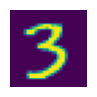

In [15]:
show_image(three_tensors[1])

In [16]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [17]:
len(stacked_threes.shape)

3

In [18]:
stacked_threes.ndim

3

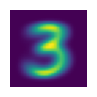

In [20]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

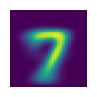

In [22]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

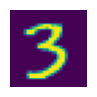

In [23]:
a_3 = stacked_threes[1]
show_image(a_3);

In [24]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [25]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [26]:
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [27]:
data = [[1, 2, 3], [4, 5, 6]]
arr = array(data)
tns = tensor(data)

print(arr) # 넘파이
print(tns) # 파이토치

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [28]:
tns[1]

tensor([4, 5, 6])

In [29]:
tns[:,1]

tensor([2, 5])

In [30]:
tns[1, 1:3]

tensor([5, 6])

In [31]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [32]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [33]:
tns.type()

'torch.LongTensor'

In [34]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

In [35]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/"valid"/"3").ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/"valid"/"7").ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [36]:
def mnist_distance(a,b) : return (a-b).abs().mean((-1, -2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [37]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [38]:
tensor([1, 2, 3]) + tensor(1)

tensor([2, 3, 4])

In [39]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

In [40]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [42]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [43]:
is_3(valid_3_tens)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [44]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1-is_3(valid_7_tens).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [49]:
xt = tensor(3.).requires_grad_()

In [50]:
yt = f(xt)

In [51]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [52]:
yt.backward()

In [53]:
xt.grad

tensor(6.)

In [54]:
xt = tensor([3., 4., 10.]).requires_grad_()

In [55]:
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [56]:
def f(x) : return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [57]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [58]:
time = torch.arange(0, 20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

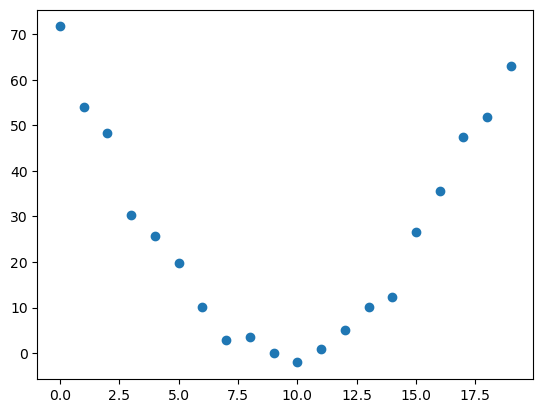

In [59]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed);

In [60]:
def f(t, params):
    a, b, c = params
    return a*(t**2) + (b*t)+c

In [79]:
def mse(preds, targets):
    return ((preds-targets)**2).mean().sqrt()

In [62]:
params = torch.randn(3).requires_grad_()

In [63]:
preds = f(time, params)

In [64]:
def show_preds(preds, ax=None):
    if ax is None: 
        ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color="red")
    ax.set_ylim(-300, 100)

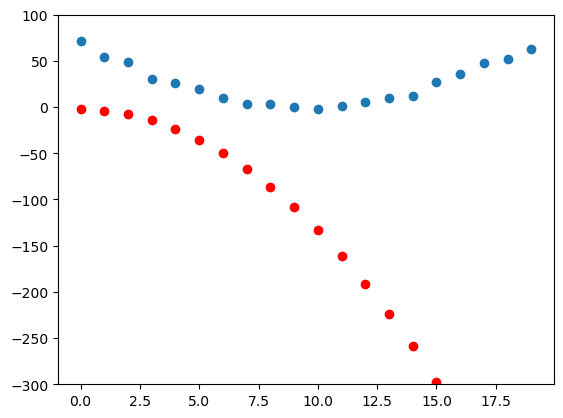

In [65]:
show_preds(preds)

In [66]:
loss = mse(preds, speed)
loss

tensor(245.2856, grad_fn=<SqrtBackward0>)

In [68]:
loss.backward()
params.grad

tensor([-166.7122,  -10.7100,   -0.7748])

In [69]:
params.grad*1e-5

tensor([-1.6671e-03, -1.0710e-04, -7.7481e-06])

In [70]:
params

tensor([-1.3058, -0.0504, -2.4324], requires_grad=True)

In [71]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [72]:
preds = f(time, params)
mse(preds, speed)

tensor(245.0066, grad_fn=<SqrtBackward0>)

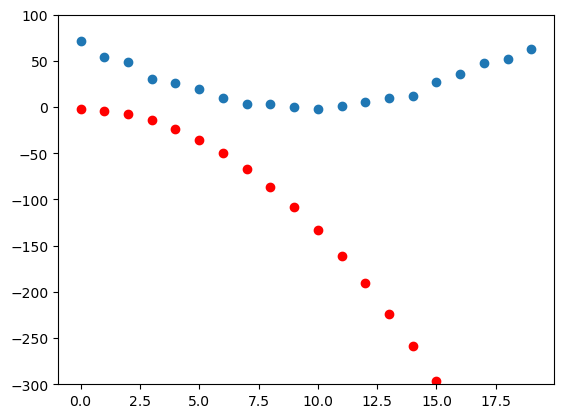

In [73]:
show_preds(preds)

In [74]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [75]:
for i in range(10): apply_step(params)

245.006591796875
244.72750854492188
244.4484405517578
244.16940307617188
243.8903350830078
243.61129760742188
243.33226013183594
243.05325317382812
242.7742156982422
242.49520874023438


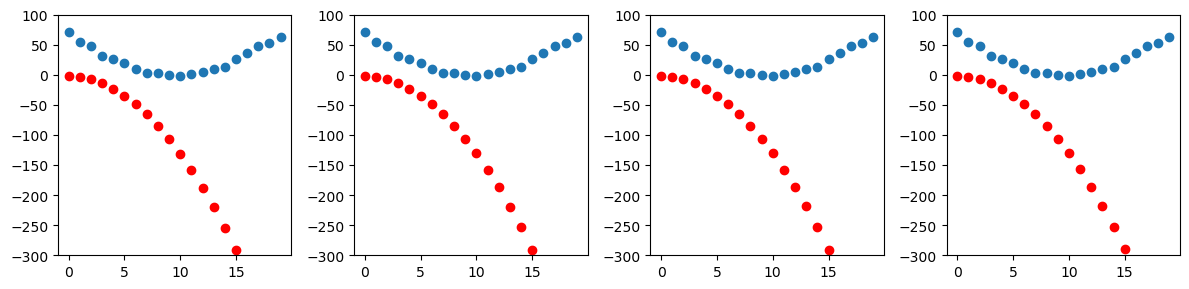

In [80]:
_, axs = plt.subplots(1, 4, figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [81]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [82]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [83]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [84]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [85]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))

In [86]:
bias = init_params(1)

In [87]:
(train_x[0]*weights.T).sum() + bias

tensor([5.6680], grad_fn=<AddBackward0>)

In [88]:
def linear1(xb): 
    return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ 5.6680],
        [ 0.0943],
        [-6.3598],
        ...,
        [ 5.4936],
        [ 0.5956],
        [ 9.0746]], grad_fn=<AddBackward0>)

In [89]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [False],
        [False],
        ...,
        [False],
        [False],
        [False]])

In [90]:
corrects.float().mean().item()

0.4045659899711609

In [95]:
weights[0] = weights[0] * 1.0001

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [94]:
preds = linear1(train_x)
((preds>0.5).float() == train_y).float().mean().item()

0.4045659899711609

In [96]:
trgts = tensor([1, 0, 1])

In [97]:
prds = tensor([0.9, 0.4, 0.2])

In [98]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [99]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])